# Data Analytics - Lab 2 - Intro to stan

<span style="font-size: 20px;">
Konrad Prokop, 408687
</span>

In [16]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 - Generated Quantities Block

In [17]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [18]:
samples = gen_quant.sample(data={'M':10}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Excercise 2 - Constraints on the data

In [19]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [20]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Excercise 3 - Constraints on parameters

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 2 |          | 00:00 Status


chain 1 |▊         | 00:00 Iteration:  400 / 7000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |██▋       | 00:00 Iteration: 1600 / 7000 [ 22%]  (Sampling)


chain 1 |███▍      | 00:00 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |████▎     | 00:00 Iteration: 2800 / 7000 [ 40%]  (Sampling)


chain 1 |█████▏    | 00:00 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |█████▉    | 00:00 Iteration: 4000 / 7000 [ 57%]  (Sampling)


chain 1 |██████▊   | 00:00 Iteration: 4600 / 7000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 5200 / 7000 [ 74%]  (Sampling)


chain 1 |████████▍ | 00:01 Iteration: 5800 / 7000 [ 82%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed    


INFO:cmdstanpy:CmdStan done processing.


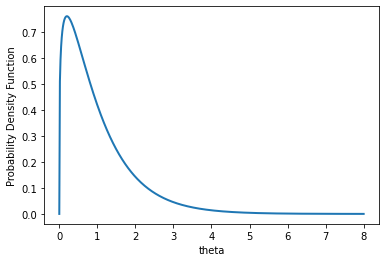

In [21]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


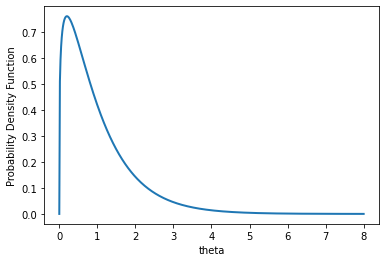

In [22]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)


plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving

In [23]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 6
L = 6
y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 StatusERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Command and output files:
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/GA/Data-Analytics/lab2/code_6', 'id=1', 'random', 'seed=61391', 'data', 'file=/tmp/tmp9t2_c2p4/pumk4scq.json', 'output', 'file=/tmp/tmp9t2_c2p4/code_6-20240326150635.csv', 'method=sample', 'num_samples=1', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9t2_c2p4/code_6-20240326150635.csv
 console_msgs (if any):
	/tmp/tmp9t2_c2p4/code_6-20240326150635_0-stdout.txt

## Excercise 5 - different methods of defining models

In [ ]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 11062001 #integer, my date of birth in the DDMMYYYY format
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


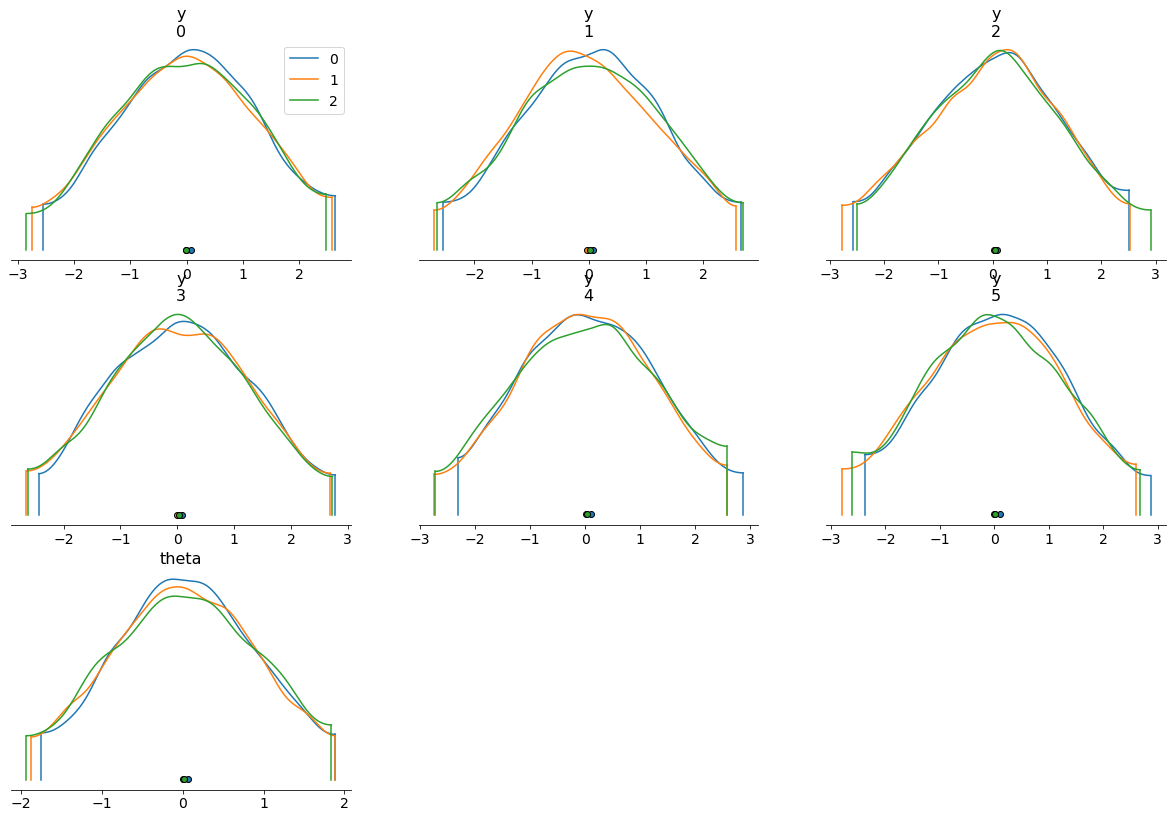

In [ ]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:compiling stan file /GA/Data-Analytics/lab2/code_10.stan to exe file /GA/Data-Analytics/lab2/code_10


INFO:cmdstanpy:compiled model executable: /GA/Data-Analytics/lab2/code_10
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing


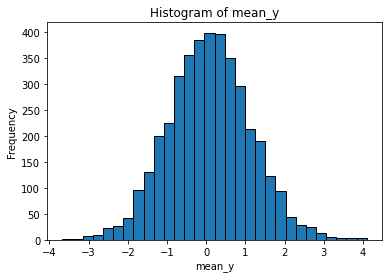

In [ ]:
model_gq = CmdStanModel(stan_file='code_10.stan')
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample = result_1)

mean_y_samples = mean_of_y.stan_variable('mean_y')

plt.hist(mean_y_samples, bins=30, edgecolor='black')
plt.xlabel('mean_y')
plt.ylabel('Frequency')
plt.title('Histogram of mean_y')
plt.show()